In [1]:
#import time
from utils import utils
from sklearn.model_selection import train_test_split
from classificador_bayesiano import ClassificadorBayesiano
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# t = time.time()
# ...
# elapsed = time.time() - t
# print('\nTempo gasto: '+str(elapsed))

dados = utils.get_base_de_dados()
rotulos_yeast = dados['SEQUENCE NAME']
atributos_yeast = dados.drop('SEQUENCE NAME', axis=1)

# Normalização dos dados
atributos_yeast_norm = utils.normalizar_dados(atributos_yeast)
atributos_yeast = atributos_yeast_norm 

x_treino, x_teste , y_treino, y_teste = train_test_split(atributos_yeast,rotulos_yeast,test_size=0.3, stratify=rotulos_yeast)
NB = ClassificadorBayesiano()
NB.fit(x_treino, y_treino)

# Implementação do classificador bayesiano de acordo com o que foi pedido na disciplina de AM
bayes_clf = ClassificadorBayesiano()
knn_clf = KNeighborsClassifier(n_neighbors=5)
reg_log_clf = LogisticRegression(max_iter=200)
arv_dec_clf = DecisionTreeClassifier()


bayes_clf.fit(x_treino, y_treino)
knn_clf.fit(x_treino, y_treino)
reg_log_clf.fit(x_treino, y_treino)
arv_dec_clf.fit(x_treino, y_treino)


res_bayes_clf = bayes_clf.score(x_teste, y_teste)
res_knn_clf = knn_clf.score(x_teste, y_teste)
res_reg_log_clf = reg_log_clf.score(x_teste, y_teste)
res_arv_dec_clf = arv_dec_clf.score(x_teste, y_teste)

ensemble = VotingClassifier(estimators=[('bayes_clf', bayes_clf), ('knn_clf', knn_clf),('reg_log_clf', reg_log_clf), ('arv_dec_clf', arv_dec_clf)], voting='hard')
ensemble.fit(x_treino, y_treino)
ensemble = ensemble.score(x_teste, y_teste)

print('Bayes: ', res_bayes_clf*100)
print('KNN:',res_knn_clf*100)
print('Reg: ', res_reg_log_clf*100)
print('Arvore: ', res_arv_dec_clf*100)
print('Ensemble: ', ensemble*100)
 
 
bayes_clf.fit(atributos_yeast, rotulos_yeast)

KeyError: '3SEQUENCE NAME'

In [3]:
dados[dados['SEQUENCE NAME'] == 'ERL']

bayes_clf.mu_
#bayes_clf.variancias_

array([[0.48071274, 0.46950324, 0.53542117, 0.22710583, 0.50431965,
        0.00107991, 0.49939525, 0.25723542],
       [0.792     , 0.772     , 0.482     , 0.336     , 1.        ,
        0.        , 0.546     , 0.246     ],
       [0.73542857, 0.71685714, 0.49257143, 0.292     , 0.5       ,
        0.        , 0.45571429, 0.22657143],
       [0.78863636, 0.75659091, 0.37613636, 0.31181818, 0.5       ,
        0.        , 0.51295455, 0.26818182],
       [0.72156863, 0.60313725, 0.41490196, 0.28254902, 0.50980392,
        0.        , 0.51019608, 0.2454902 ],
       [0.4308589 , 0.4895092 , 0.36429448, 0.21349693, 0.50306748,
        0.        , 0.5101227 , 0.27      ],
       [0.52143443, 0.5332377 , 0.51737705, 0.40442623, 0.5       ,
        0.00885246, 0.50168033, 0.24098361],
       [0.45244755, 0.45613054, 0.52932401, 0.22834499, 0.5034965 ,
        0.        , 0.49410256, 0.33167832],
       [0.521     , 0.508     , 0.5065    , 0.2475    , 0.5       ,
        0.4235    , 0.503   

In [16]:
from utils import graficos
import numpy as np
#graficos.grafico_pareado(atributos_yeast, rotulos_yeast)
df = dados[dados['SEQUENCE NAME'] == 'ERL']
df = df.drop('SEQUENCE NAME', axis=1)
print(bayes_clf.classes_[1],": ", bayes_clf.mu_[1])
medias = df.astype('float').mean()

v = 0
for index, row in df.iterrows():
    row = row.astype('float')
    v += np.linalg.norm(np.subtract(row, medias.to_numpy()))**2  
v = v/(5*8)
print('Sigma: ',v)
#for k in range(len(bayes_clf.classes_)):
    #print(bayes_clf.classes_[k],": ", bayes_clf.variancias_[k])
variancias = 0
for index, row in df.iterrows():
    row = row.astype('float')
    variancias += np.linalg.norm(np.subtract(row,medias.to_numpy()))**2    
variancias = variancias/(5*8) 
variancias   

ERL :  [0.792 0.772 0.482 0.336 1.    0.    0.546 0.246]
Sigma:  0.0037799999999999995


0.0037799999999999995

Mapa de correlação

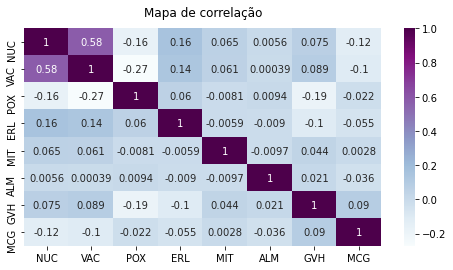

In [ ]:
from utils import graficos

graficos.correlacao(atributos_yeast)

Gráfico 2D UMAP

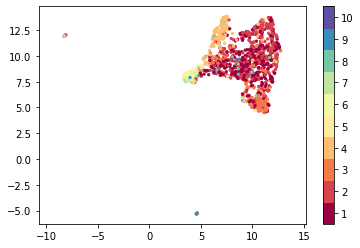

In [ ]:
graficos.grafico_2d_umap(atributos_yeast, rotulos_yeast)

In [1]:
#import time
from utils import utils
from sklearn.model_selection import train_test_split
from modelos.classificador_bayesiano_parzen import ClassificadorBayesianoParzen
import numpy as np
dados = utils.get_base_de_dados()
rotulos_yeast = dados['SEQUENCE NAME']
atributos_yeast = dados.drop('SEQUENCE NAME', axis=1)

# Normalização dos dados
atributos_yeast_norm = utils.normalizar_dados(atributos_yeast)
atributos_yeast = atributos_yeast_norm 

x_treino, x_teste , y_treino, y_teste = train_test_split(atributos_yeast,rotulos_yeast,test_size=0.3, stratify=rotulos_yeast)


x_exemplos = x_treino.to_numpy()
x_treino[y_treino == 'ERL']
h = 3E-8
parzen_clf = ClassificadorBayesianoParzen(h = h)
parzen_clf.fit(x_treino, y_treino)
score_parzen = parzen_clf.score(x_teste, y_teste)
print('Score: ', score_parzen)



[4.10473303e-08 4.01651579e-08 3.05273652e-08 3.93601119e-08
 4.20969435e-08 4.20969435e-08 4.10139517e-08 2.04907822e-08]
[4.16271754e-08 2.75829553e-08 3.77983132e-08 3.44469197e-08
 4.20969435e-08 4.20969435e-08 4.10139517e-08 3.21716699e-08]
[3.17987489e-08 4.20660562e-08 3.53571867e-08 3.29494687e-08
 4.20969435e-08 4.20969435e-08 4.05463045e-08 3.37085972e-08]
[3.17987489e-08 2.85510998e-08 3.53571867e-08 3.98220023e-08
 4.20969435e-08 4.20969435e-08 4.17038109e-08 3.65160874e-08]
[3.86717480e-08 2.95098740e-08 3.05273652e-08 2.97477326e-08
 4.20969435e-08 4.20969435e-08 4.19217624e-08 2.97477326e-08]
[3.35397433e-08 4.20660562e-08 3.53571867e-08 3.98220023e-08
 4.20969435e-08 4.20969435e-08 3.62287558e-08 2.04907822e-08]
[3.08973604e-08 4.16054566e-08 3.62172774e-08 2.55330869e-08
 4.20969435e-08 4.20969435e-08 4.20530797e-08 3.65160874e-08]
[4.16271754e-08 3.96670990e-08 3.85115449e-08 4.20034986e-08
 4.20969435e-08 4.20969435e-08 4.19217624e-08 4.17244066e-08]
[2.99794404e-08 

KeyboardInterrupt: 

In [2]:
a = [2, 3, 4, 10, 9]
b = [2, 3, 4, 10, 9]
np.argmax(a)

np.dot(a, b)



array([  4,   9,  16, 100,  81])